## تحلیل اکتشافی داده ها در پایتون - بررسی داده های کشتی تایتانیک# 

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## مقدمه
اولین گام در *یادگیری ماشین* و * مهندسی داده* ، بررسی مجموعه داده های موجود و آشنایی با خواص مختلف آماری آنهاست که به نام *[تحلیل اکتشافی داده](http://www.bigdata.ir/1394/03/%D8%AA%D8%AD%D9%84%DB%8C%D9%84-%D8%A7%DA%A9%D8%AA%D8%B4%D8%A7%D9%81%DB%8C-%D8%AF%D8%A7%D8%AF%D9%87-%D9%87%D8%A7-%D8%AF%D8%B1-%D9%BE%D8%A7%DB%8C%D8%AA%D9%88%D9%86/)*  از آن یاد می کنیم. 
 در بسیاری از موارد، این تحلیل اولیه، عملیات *پیش پردازش داده* را هم جهت می دهد و تعیین می کند کدام یک خواص [Featues] یا مشخصات داده ها باید حذف شوند و یا چه تبدیلاتی روی داده ها باید صورت گیرد تا آماده ورود به مراحل بعد و اعمال الگوریتم های مختلف *یادگیری ماشین *  شویم. 

*مهندسی داده* با هدف تعمیق بینش علاقه مندان به این حوزه با بیان مثالهای مختلف، این مراحل ابتدایی را با استفاده از زبانهای برنامه نویسی رایج از جمله پایتون و R به صورت عملی آموزش خواهد داد. برای شروع از بررسی [داده های مسافران کشتی تایتانیک](https://www.kaggle.com/c/titanic) استفاده خواهیم کرد که یکی از مسابقات ابتدایی [سایت معروف کگل](https://www.kaggle.com) برای ورود به بحث مسابقات پردازش داده است . 

هدف از این مسابقه پردازش داده، بررسی داده های تعدادی از مسافرین، مثلا کلاس یا درجه بلیط ، جنسیت ، مکان سوار شدن و ... ، پیش بینی این است که یک مسافر خاص زنده می ماند یا نه ؟  که یک مساله *دسته بندی* محسوب میشود.
مشخصات مختلف داده ها را می توانید از [این آدرس](https://www.kaggle.com/c/titanic/data) مشاهده کنید و فایل CSV  حاوی داده های 891 نفر از مسافرین که داده های آموزشی و اولیه ما را تشکیل می دهند هم از [این آدرس]
(https://www.kaggle.com/c/titanic/download/train.csv) قابل دانلود است .  

*نمونه کدها و کتابچه پایتون مربوطه را در [گیت هاب](https://github.com/smbanaie/IPython-Notebooks/blob/master/Exploratory%20Python%20Data%20Analysis/Baby%20Steps/Titanic_Sample.ipynb) قرارداده ام که توسط علاقه مندان به راحتی قابل دسترسی و استفاده باشد . *


## آماده سازی محیط کار 
برای راحتی کار از [محیط IPython](http://www.bigdata.ir/1394/09/ipython-%DB%8C%DA%A9-%D9%85%D8%AD%DB%8C%D8%B7-%D8%AA%D8%B9%D8%A7%D9%85%D9%84%DB%8C-%D9%85%D8%A8%D8%AA%D9%86%DB%8C-%D8%A8%D8%B1-%D9%88%D8%A8-%D8%A8%D8%B1%D8%A7%DB%8C-%D9%86%D9%88%D8%B4%D8%AA%D9%86/)  برای اجرای کدها و نمایش نتایج استفاده خواهیم کرد که می توانید کتابچه پایتون مربوطه را از این آدرس مشاهده و دانلود کنید.   این فایل را  در همین پوشه ای که فایل پایتون یا کتابچه  پایتون شما قرار گرفته است،  با نام train.csv  ذخیره کنید.
کار را با اجرای  IPython  و خواندن داده ها و بارگذاری آنها  به قالب جدولی با استفاده از کتابخانه pandas شروع می کنیم 


ipython notebook --pylab=inline

In [3]:
import pandas as pd
import numpy as np
import matplotlib as plt

df = pd.read_csv("train.csv") #Reading the dataset in a dataframe using Pandas

##  نگاهی به داده ها
در اولین گام  از فرآیند  تحلیل اکتشافی ابتدا نگاهی به ده سطر اول  مجموعه داده  مسافران  می  اندازیم 


In [4]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C


با تابع  describe  می توانیم اطلاعات کلی آماری راجع به فیلدها و یا ستون های عددی به دست آوریم :

In [5]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


همانطور که مشاهده می کنید شماره مسافر و ستون وضعیت زنده ماندن شخص برابر با تعداد داده ها یا همان 891 است.
انحراف معیار و میانگین روی برخی فیلدهای عددی مانند شماره مسافر معنادار نیست که وظیفه تحلیل آن بر عهده شماست.
با این وجود با نگاهی به جدول فوق نتایج زیر قابل  استنتاج خواهند بود :
+  تعداد  277 نفر  یعنی 891-714 نفر سنشان معلوم نیست . 
+  38%  از مسافران  زنده مانده اند.  چون ستون Survived که عدد یک آن نشانگر زنده ماندن و عدد صفر آن نشان دهنده فوت شدن مسافر است، میانگینی برابر 0.38  دارد که  چون این میانگین جمع عددهای یک یعنی زنده ماندگان بر کل افراد بوده است  پس نتیجه میگیریم که  38 درصد افراد زنده مانده اند.
+  با نگاه به چارک ها نتیجه می گیریم که بالای  50  درصد افراد  مسافر درجه سه بوده اند یعنی PClass  آنها برابر 3 است .
+  سن افراد  میانگین و انحراف معیار مناسبی دارد  (میانگین 29 و انحراف از معیار 14)  . همچنین تعداد برادران و خواهران (SibSp)  و نیز تعداد فرزندان یا پدرومادر (Parch)  هم توزیعی  مطابق با انتظار دارد .
+  عدد 512  در ستون آخر با توجه به میانگین و توزیع چارک ها یک عدد  انحرافی  به نظر میرسد که  شاید بهتر باشد از مجموعه داده ها حذف شود. 

از طرفی روی هر ستون از داده ها به صورت جداگانه می توان توابع آماری مورد نیاز را اجرا کرد. مثلاً :

In [6]:
df['Age'].median()

28.0

میانه را برای  ستون سن به ما می دهد.  در مورد داده های غیر عددی مانند جنسیت یا بندری که مسافرین از طریق آن سوار کشتی شده اند (Embarked)  نیز می توانیم با نگاه به مقادیر  آنها  تا حدودی با آنها آشنا شویم . تابع unique این کار را برای ما انجام می دهد : 

In [7]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

همان طور که مشاهده می کنید برای بندر بارگیری ما سه مقدار S و C و Q را داریم و نیز مقدار nan که بیانگر نامعلوم بودن بندر بارگیری مسافر است .
## بررسی توزیع  های آماری 
در ادامه نگاهی به توزیع داده ها در هر ستون می اندازیم که دید واقعی تری نسبت به داده ها به ما بدهد : 


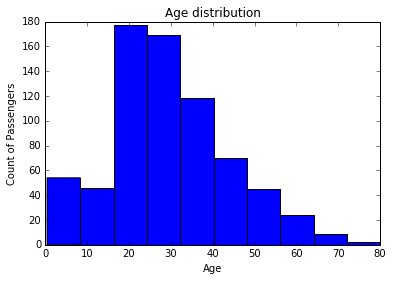

In [7]:
fig = plt.pyplot.figure()
ax = fig.add_subplot(111)
ax.hist(df['Age'], bins = 10, range = (df['Age'].min(),df['Age'].max()))
plt.pyplot.title('Age distribution')
plt.pyplot.xlabel('Age')
plt.pyplot.ylabel('Count of Passengers')
plt.pyplot.show()

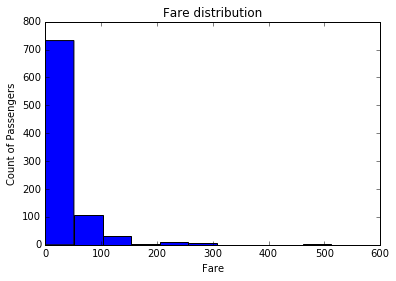

In [8]:
fig = plt.pyplot.figure()
ax = fig.add_subplot(111)
ax.hist(df['Fare'], bins = 10, range = (df['Fare'].min(),df['Fare'].max()))
plt.pyplot.title('Fare distribution')
plt.pyplot.xlabel('Fare')
plt.pyplot.ylabel('Count of Passengers')
plt.pyplot.show()

همانطور که نمودار های فوق مشخص است،  میانگین سنی  مسافرین  حدود سی سال است که درست به نظر می رسد و  کرایه پرداختی  مسافرین نیز بیشتر به سطح  مسافرین درجه سه  (C class) یعنی قشر کم در آمد متمایل است. 

نکته ای که درباره کد فوق  نیاز به توضیح دارد، تابع  add_subplot  است که یک عدد سه رقمی را به عنوان ورودی گرفته است . این تابع  برای ایجاد نمودارهای کنار هم به کار می رود و  عدد اول تعداد  نمودارها را در محور عمودی و عدد دوم تعداد نمودارها در محور افقی و عدد سوم  شماره نمودار فعلی  است .  با این حساب عدد 111 یعنی نمودار اول از یک  مجموعه نمودار یک در یک .  عدد 122 یعنی نمودار دوم از بین  یک در دو نمودار  (به صورت ماتریسی از نمودارها در نظر بگیرید  که عدد اول  تعداد سطر و عدد دوم تعداد ستون و عدد سوم هم  سلول فعلی از این ماتریس که قصد ترسیم آنرا داریم، نشان  می دهد.)

در مرحله بعد ، توزیع داده ها را  با رسم [**نمودار جعبه ای**](http://bmsusrc.ir/post/239)  بررسی می کنیم . این نمودار داده ها را به چهار بخش تقسیم می کند که بین چارک اول و چارک سوم یک مستطیل رسم می شود . یعنی مستطیل نیمی از داده ها را از لحاظ فراوانی در بر میگیرد و فضای ابتدای نمودار تا رسیدن به مستطیل ، یک چهارم اول داده ها و فضای انتهای نمودار که بعد از مستطیل قرار می گیرد ، یک چهارم آخر داده ها را نشان می دهد. خط میانی نمودار که بین مستطیل قرار می گیرد هم میانه یا وسط داده ها را نشان می دهد.

خط  پررنگ ابتدای و انتهای  نمودار هم کمینه و بیشینه داده ها را نشان میدهدو  داده هایی که خارج از این  بازه هستند به عنوان داده های پرت  شناخته می شوند که باید بررسی شوند  و به جای آنها مقدار مناسب (مثلا  میانگین ) قرار بگیرد.
توزیع کرایه ها (Fare) بسیار نامتقارن  است و باید داده های این  ستون از مسافرین حتماً بررسی  و اصلاح گردد.

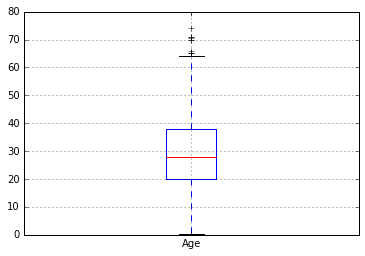

In [8]:
df.boxplot(column='Age',return_type='axes')

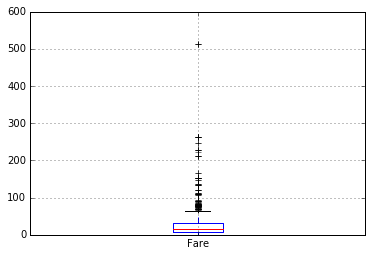

In [3]:
df.boxplot(column='Fare',return_type='axes')

یک دلیل  ناهماهنگی در داده های کرایه این است که همه مسافرین با هم مقایسه شده اند در صورتیکه  مسافرین  کشتی ، سه درجه مختلف  دارند بنابراین باید هر گروه  (کلاس)  با خودش سنجیده شود. بنابراین بهتر است در رسم نمودار جعبه ای ، این گروه بندی ها را هم درنظر بگیریم : 

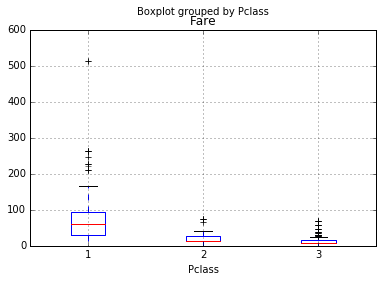

In [10]:
df.boxplot(column='Fare', by = 'Pclass')

## بررسی داده های غیر عددی 
تا اینجا داده های عددی مسافرین را تا حدودی بررسی کردیم . حال به داده های غیر عددی و رشته ای می پردازیم . 
می خواهیم تاثیر درجه بلیط یک مسافر را در میزان زنده ماندن آنها بررسی کنیم. برای این منظور دو جدول داده موقت با فیلتر کردن جدول اصلی داده های مسافرین (df) ایجاد می کنیم و با ساخت دو نمودارِ کنار هم، نتایج را مشاهده می کنیم : 

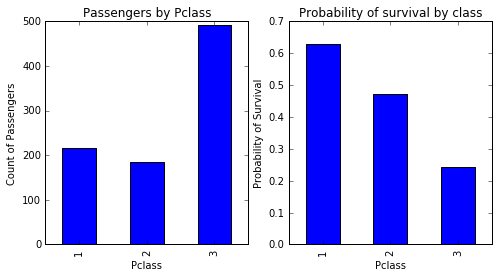

In [4]:
temp1 = df.groupby('Pclass').Survived.count()
temp2 = df.groupby('Pclass').Survived.sum()/df.groupby('Pclass').Survived.count()
fig = plt.pyplot.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Pclass')
ax1.set_ylabel('Count of Passengers')
ax1.set_title("Passengers by Pclass")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Pclass')
ax2.set_ylabel('Probability of Survival')
ax2.set_title("Probability of survival by class")

همانطور که از نمودار فوق مشاهده می شود،  درصد بیشتری از مسافرین با درجه یک  زنده مانده اند که البته طبیعی به نظر میرسد چون مسافرین ثروتمند از  امکانات نجات بیشتری استفاده کرده اند.

بعد از این مرحله می خواهیم  تاثیر جنسیت را هم در نجات مسافرین بررسی کنیم . برای این منظور از ساخت جدول [کراس تب](http://chrisalbon.com/python/pandas_crosstabs.html) استفاده می کنیم و روی این جدول آماری ایجاد شده، نمودار مورد نیاز خود را رسم می کنیم به گونه ای که  برای محور  افقی آن  ترکیب جنسیت و کلاس و برای محور عمودی هم  زنده ماندن افراد نمایش داده شود .نتیجه را در زیر می بینید . 

همانطور که از این نمودار هم مشخص است  میزان  زنده ماندن خانمها از آقایان بیشتر است و  تقریبا همه خانمهای مسافر درجه یک هم نجات پیدا کرده اند ....

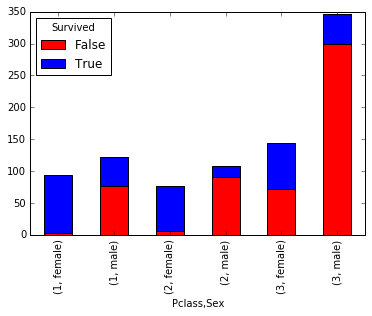

In [5]:
temp3 = pd.crosstab([df.Pclass, df.Sex], df.Survived.astype(bool))
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

می توانیم بندر بارگیری مسافران را هم به این صورت تحلیل کنیم که متوجه میشویم مسافرینی که در بندر C سوار شده اند شانس بیشتری برای زنده ماندن داشته اند که البته شاید به خاطر درجه بلیط آنها بوده است . 

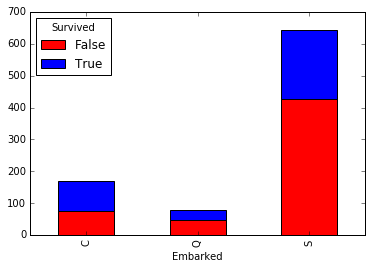

In [10]:
temp3 = pd.crosstab(df.Embarked, df.Survived.astype(bool))
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

##  سخن پایانی 
در این نوشتار الفبای پردازش داده با پایتون را بررسی کردیم  و بدون وارد شدن به بسیاری از جزییات ،  وارد حیطه جذاب و کاربردی  مصورسازی داده ها شدیم . حوزه ای که  تخصص آن به ممارست و تمرین نیاز دارد و  گام مهمی در پردازش داده هاست . 
در آموزشهای بعدی به پیش پردازش داده ها خواهیم پرداخت .....